###  Objective: 
1. Perform EDA on HY_Universe_corporate bond

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np
import pandas as  pd
import os
import math
import re
pd.options.display.max_columns=40
import seaborn as sns

In [2]:
### Readin the data
path="C:\\Users\\fbaharkoush\\IE 598 Machine Learning\\Homework\\HW 3\\"
df_bond=pd.read_csv(path+"HY_Universe_corporate bond.csv",)

###### 2.1

In [3]:
### Number of Rows and Col
print("Number of rows of Data=",df_bond.shape[0])
print("Number of columns of Data=",df_bond.shape[1])

Number of rows of Data= 2721
Number of columns of Data= 37


###### Fillna Na of numericla cols

In [4]:
list_of_numerical_col_with_nan=["Months in JNK","Months in HYG","Months in Both"]
df_bond[list_of_numerical_col_with_nan]=df_bond[list_of_numerical_col_with_nan].replace("Nan",0).astype(float)

###### 2.2

In [5]:
### Identify the types of vallues in columns

In [6]:
### Initiate List to count data Types
list_of_number_of_str=[]
list_of_number_of_float=[]
list_of_number_of_int=[]
list_of_columns=[]
for i in list(df_bond.columns):
    number_of_str=df_bond[i].apply(lambda x: type(x)==str).sum()
    number_of_float=df_bond[i].apply(lambda x: type(x)==float).sum()
    number_of_int=df_bond[i].apply(lambda x: type(x)==int).sum()
    list_of_number_of_str.append(number_of_str)
    list_of_number_of_float.append(number_of_float)
    list_of_number_of_int.append(number_of_int)
    list_of_columns.append(i)

In [7]:
df_bond_dtype_count=pd.DataFrame({"Columns":list_of_columns,
              "number_of_str":list_of_number_of_str,
             "number_of_float":list_of_number_of_float,
              "number_of_int":list_of_number_of_int})
### Count Other Data Type
df_bond_dtype_count["Other"]=df_bond_dtype_count.sum(axis=1)-df_bond.shape[0]

In [8]:
df_bond_dtype_count.head()

,Columns,number_of_str,number_of_float,number_of_int,Other
0,CUSIP,2721,0,0,0
1,Ticker,2721,0,0,0
2,Issue Date,2721,0,0,0
3,Maturity,2721,0,0,0
4,1st Call Date,2721,0,0,0


In [9]:
list_of_numerical_col=list(df_bond_dtype_count[df_bond_dtype_count["number_of_str"]==0]["Columns"])
list_of_categorical_col=list(df_bond_dtype_count[df_bond_dtype_count["number_of_str"]!=0]["Columns"])

###### 2.3

In [10]:
### df.describe() provide the summary of all the numberical columns
df_bond[list_of_numerical_col].describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,Months in JNK,Months in HYG,Months in Both,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721.000000,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
mean,10.307872,8.299295e+08,113.968997,18.218230,7.703785,10.496141,5.724366,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,724.219772,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,63.051382,5.802790e+08,101.893176,7.872071,13.906823,16.830778,12.267923,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,587.196329,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,0.000000,3.700000e+08,11.930000,4.388758,0.000000,0.000000,0.000000,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,5.000000,5.000000e+08,65.170000,12.738630,0.000000,0.000000,0.000000,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,213.000000,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,6.250000,6.500000e+08,97.370000,16.538471,0.000000,0.000000,0.000000,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,608.000000,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,7.750000,1.000000e+09,121.770000,22.120108,10.000000,16.000000,3.000000,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,1094.000000,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000
max,999.000000,7.364026e+09,1217.570000,54.673908,64.000000,67.000000,63.000000,0.546739,57935.000000,8.979960e+09,3.400000e+06,3.400000e+06,1667.000000,2442.000000,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,8.728140e+08,1.002500e+08,513.769231,160.000000


In [11]:
df_bond_categorical=df_bond[list_of_categorical_col].drop(["Issue Date","Maturity","1st Call Date","CUSIP"],axis=1)

In [12]:
df_bond_categorical.head()

,Ticker,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Maturity Type,Coupon Type,Industry,IN_ETF
0,FLECIN,Nan,Nan,Nan,Nan,CALLABLE,PAY-IN-KIND,Real Estate,No
1,RBS,Ba1,BB+,BBB,BB+,AT MATURITY,FIXED,Banks,Yes
2,ACCO,WR,NR,BB+,NR,CALLABLE,FIXED,Household Products/Wares,No
3,ACCO,WR,NR,WD,NR,CALLABLE,FIXED,Household Products/Wares,Yes
4,ACCO,B1,BB-,BB,BB-,CALLABLE,FIXED,Household Products/Wares,No


In [13]:
#### Gerante dataframe cunnting each category value in each col
for i in list_of_categorical_col:
    print(df_bond.groupby(i)[i].count().reset_index(name="Count"))

          CUSIP  Count
0     000324AA1      1
1     00080QAB1      1
2     00081TAD0      1
3     00081TAH1      1
4     00081TAJ7      1
5     00101JAE6      1
6     00101JAF3      1
7     00101JAG1      1
8     00101JAH9      1
9     00101JAJ5      1
10    00101JAK2      1
11    00101JAL0      1
12    00101NAB3      1
13    00105DAD7      1
14    00107TAA6      1
15    001306AB5      1
16    00130HAU9      1
17    00130HBC8      1
18    00130HBH7      1
19    00130HBL8      1
20    00130HBN4      1
21    00130HBQ7      1
22    00130HBS3      1
23    00130HBT1      1
24    00130HBU8      1
25    00130HBV6      1
26    00130HBW4      1
27    00130HBX2      1
28    00130HBY0      1
29    00131MAE3      1
...         ...    ...
2691  62913TAD4      1
2692  62913TAE2      1
2693  62913TAH5      1
2694  62913TAJ1      1
2695  62913TAL6      1
2696  62913TAM4      1
2697  62914QAA5      1
2698  62914QAD9      1
2699  629377AT9      1
2700  629377AU6      1
2701  629377AX0      1
2702  62937

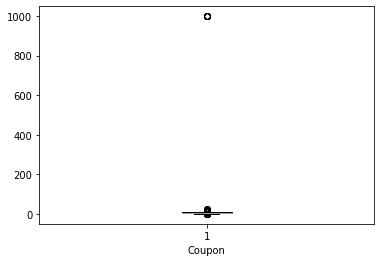

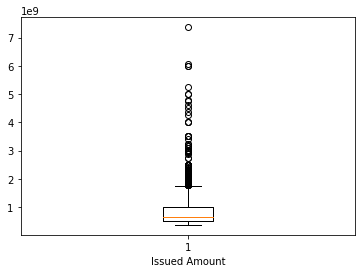

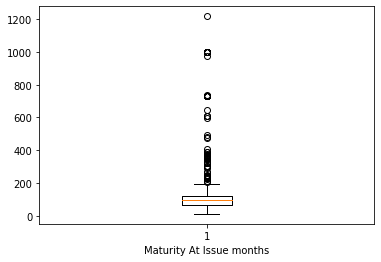

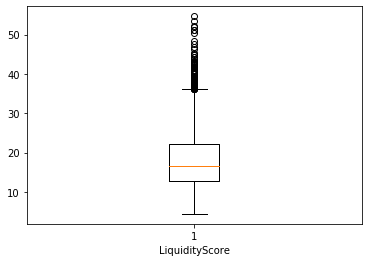

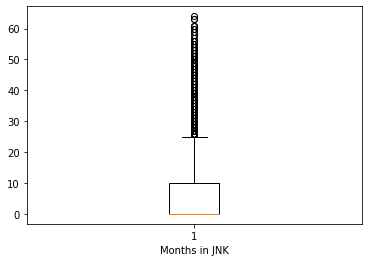

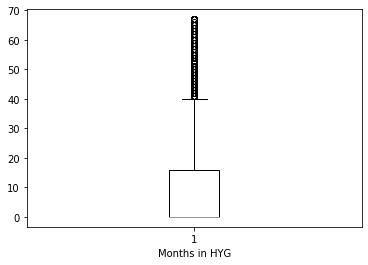

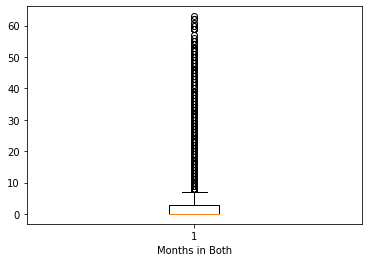

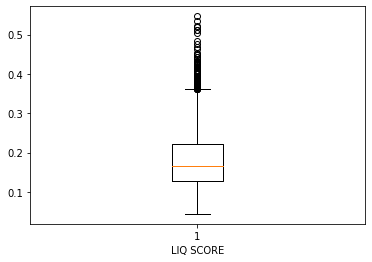

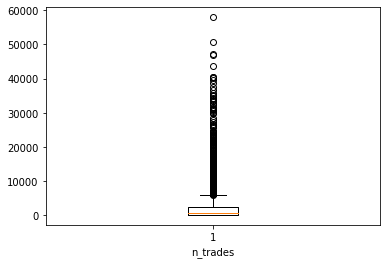

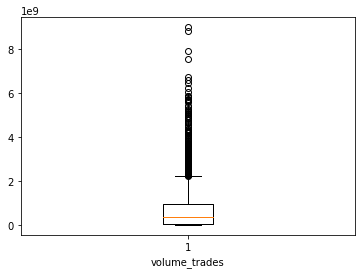

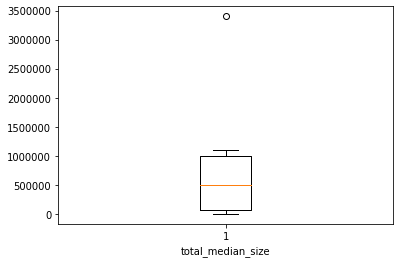

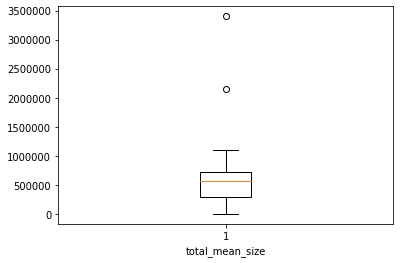

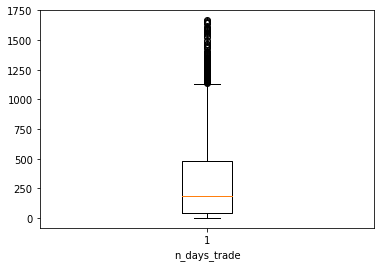

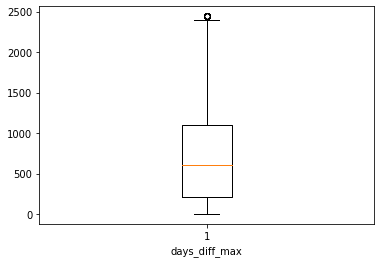

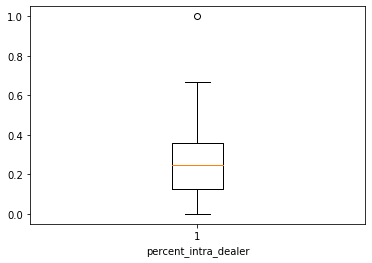

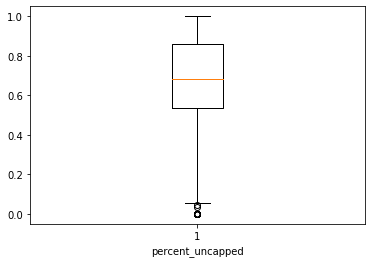

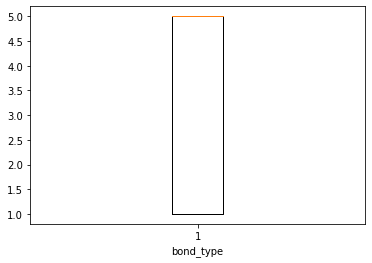

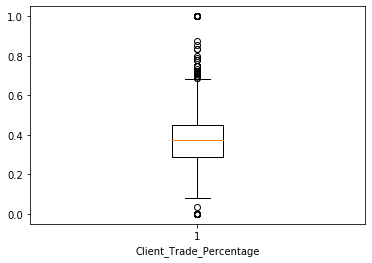

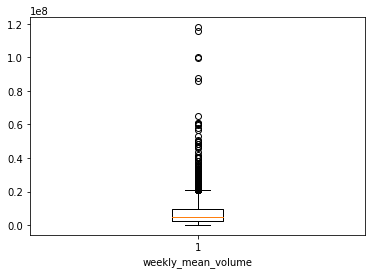

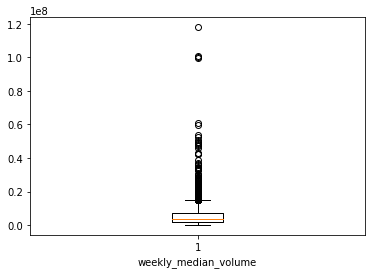

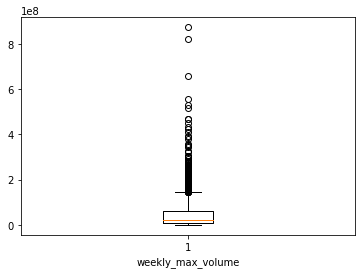

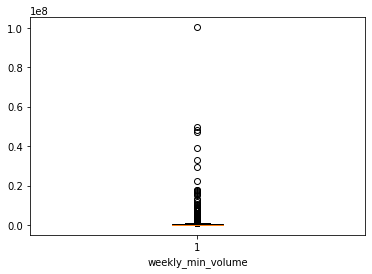

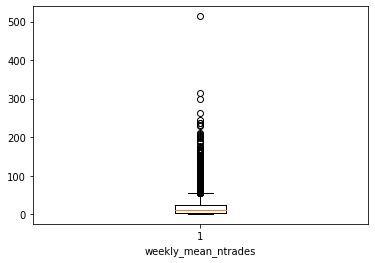

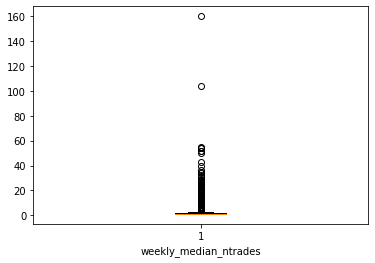

In [14]:
for i in list_of_numerical_col:
    plt.boxplot(df_bond[i])
    plt.xlabel(i)
    plt.show()

#### 2.4

In [15]:
import pylab 
import scipy.stats as stats

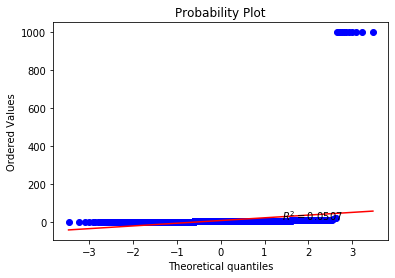

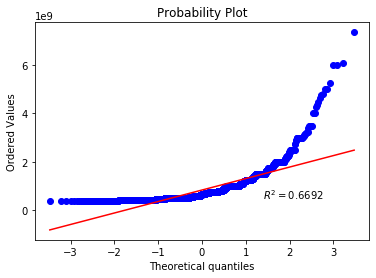

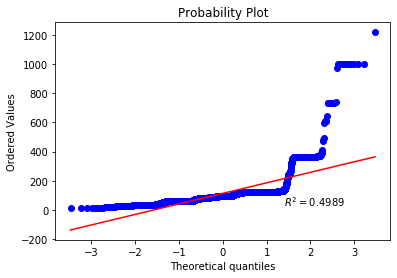

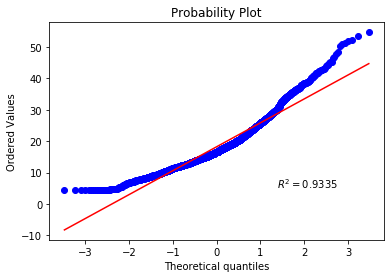

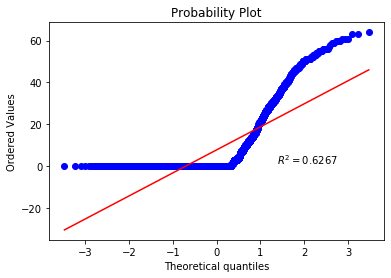

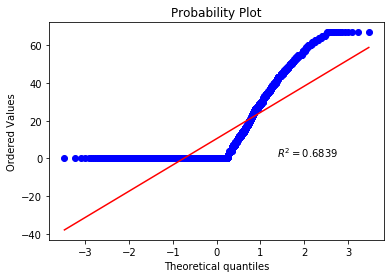

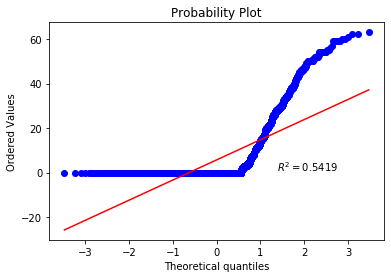

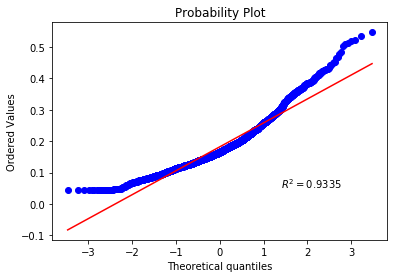

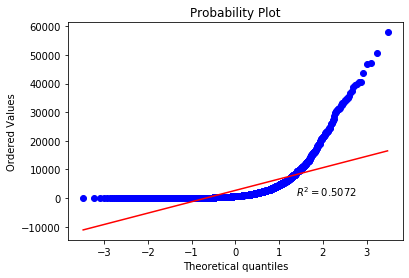

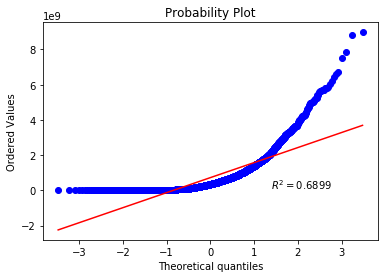

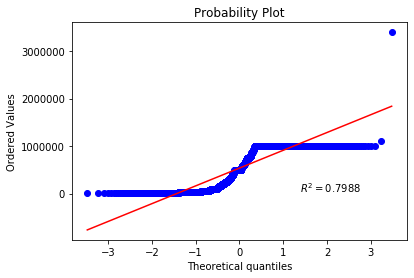

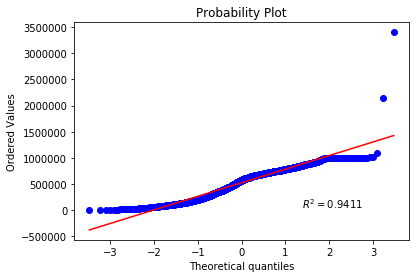

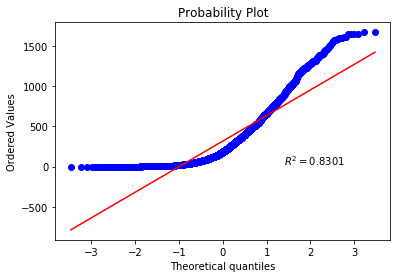

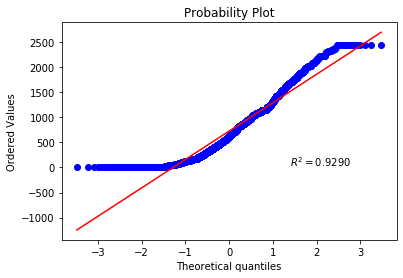

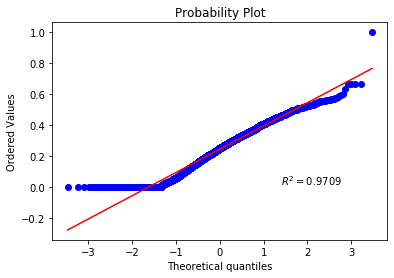

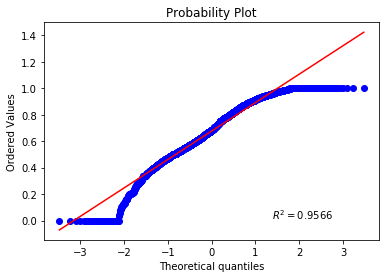

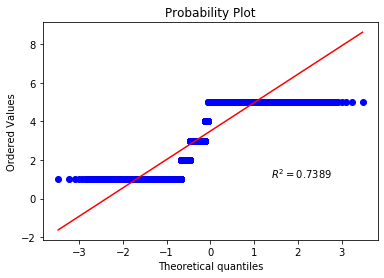

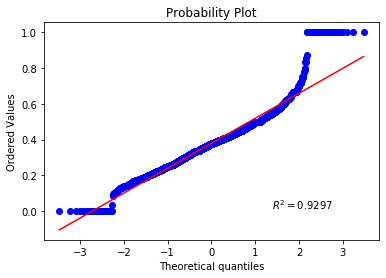

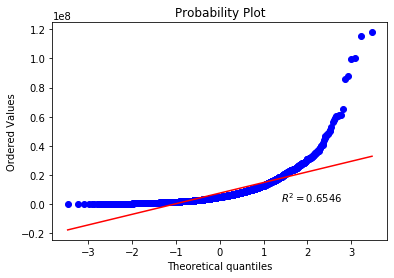

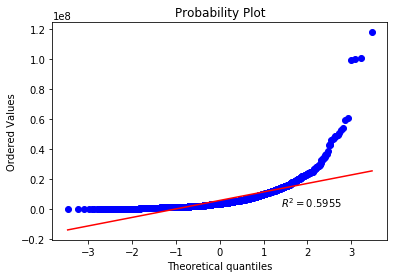

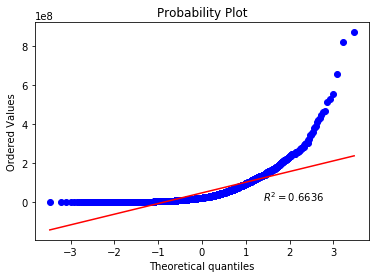

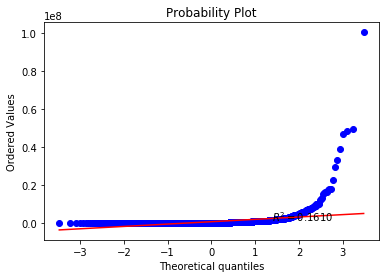

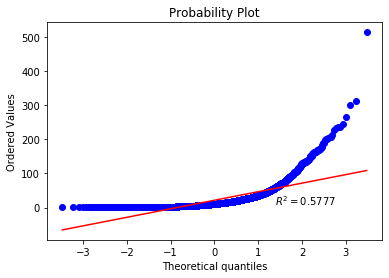

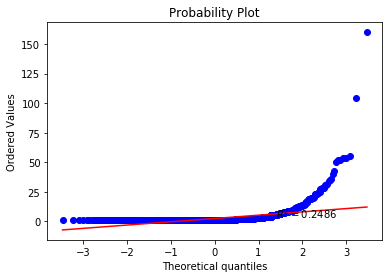

In [16]:
for i in list_of_numerical_col:
    measurements =df_bond[i]
    stats.probplot(measurements, dist="norm", plot=pylab,rvalue=True)
    pylab.show()

#### 2.5

In [17]:
df_bond.describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,Months in JNK,Months in HYG,Months in Both,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721.000000,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
mean,10.307872,8.299295e+08,113.968997,18.218230,7.703785,10.496141,5.724366,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,724.219772,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,63.051382,5.802790e+08,101.893176,7.872071,13.906823,16.830778,12.267923,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,587.196329,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,0.000000,3.700000e+08,11.930000,4.388758,0.000000,0.000000,0.000000,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,5.000000,5.000000e+08,65.170000,12.738630,0.000000,0.000000,0.000000,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,213.000000,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,6.250000,6.500000e+08,97.370000,16.538471,0.000000,0.000000,0.000000,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,608.000000,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,7.750000,1.000000e+09,121.770000,22.120108,10.000000,16.000000,3.000000,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,1094.000000,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000
max,999.000000,7.364026e+09,1217.570000,54.673908,64.000000,67.000000,63.000000,0.546739,57935.000000,8.979960e+09,3.400000e+06,3.400000e+06,1667.000000,2442.000000,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,8.728140e+08,1.002500e+08,513.769231,160.000000


#### 2.6

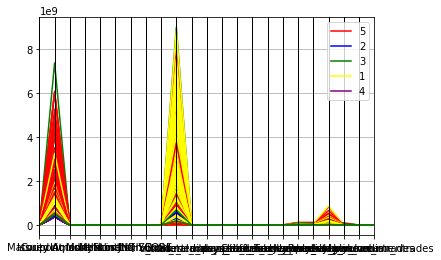

In [18]:
### parallel coordinates plot for Bonds Type 1,2,3,4 
### obviously it is not a good graph since there are many numerical values as featers for Bond Types
pd.plotting.parallel_coordinates(df_bond[list_of_numerical_col],"bond_type",
                                 color=["red","blue","green","yellow","purple"])
plt.show()

### 2.7

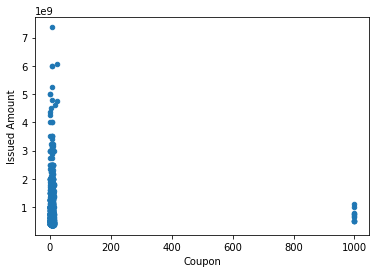

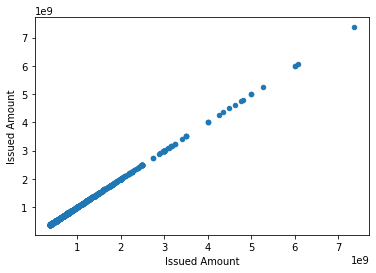

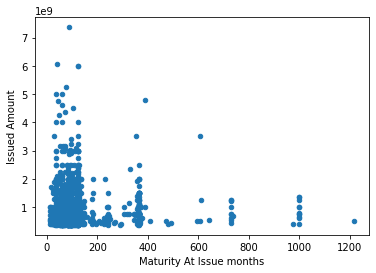

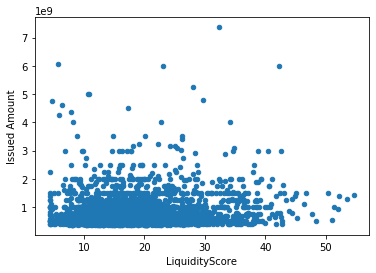

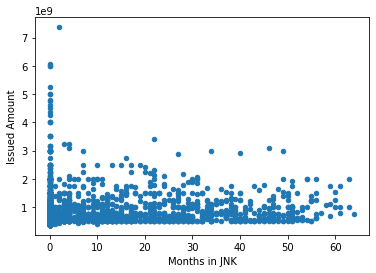

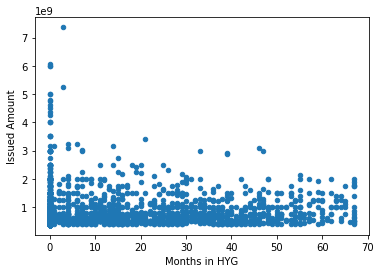

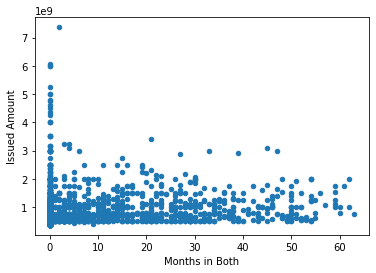

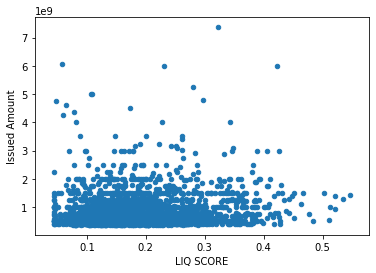

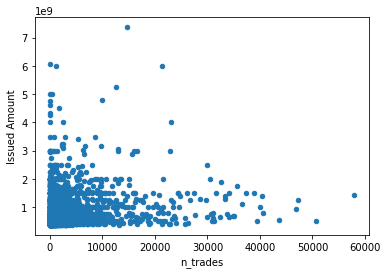

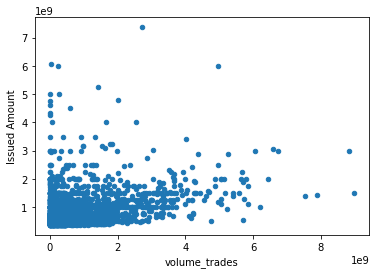

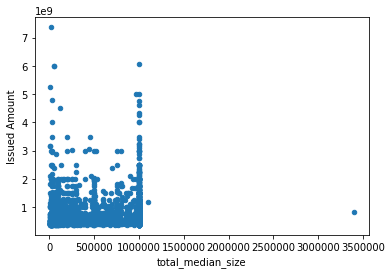

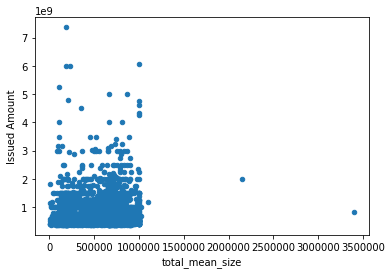

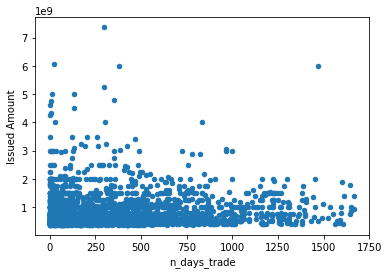

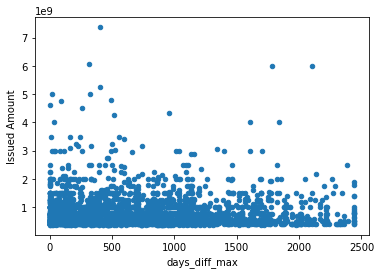

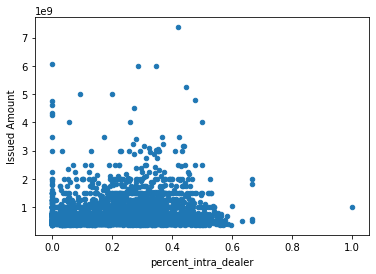

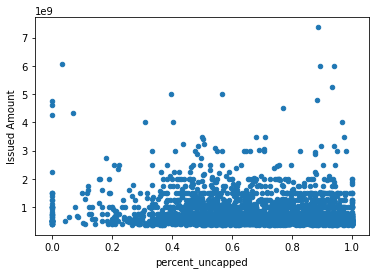

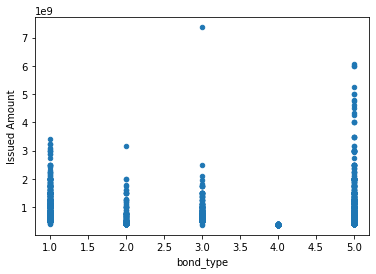

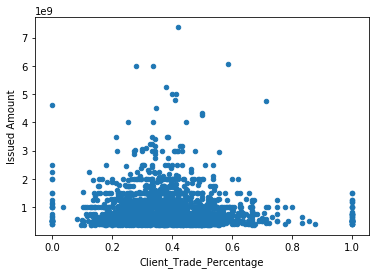

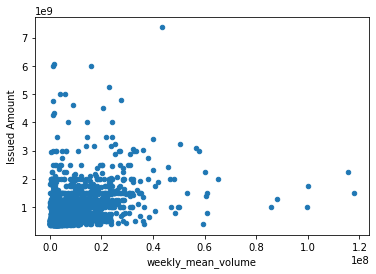

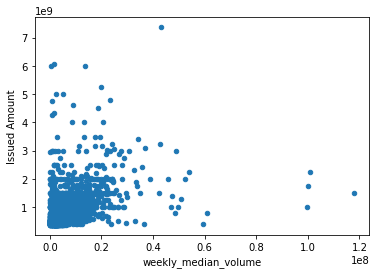

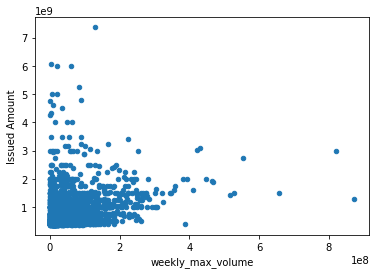

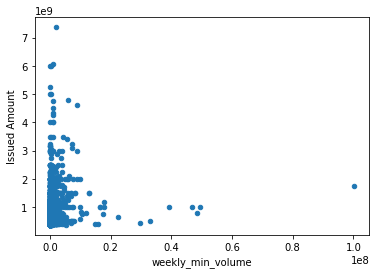

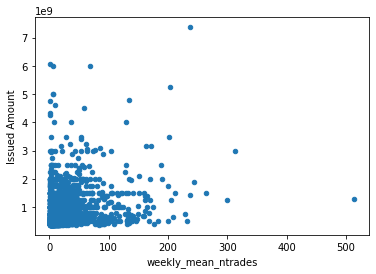

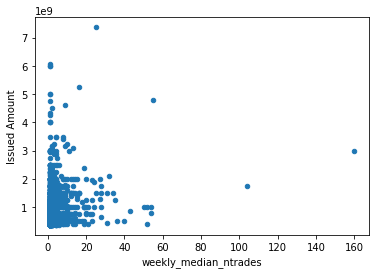

In [19]:
for i in list_of_numerical_col:
    df_bond.plot.scatter(x=i, y='Issued Amount')
    plt.show()

### 2.8

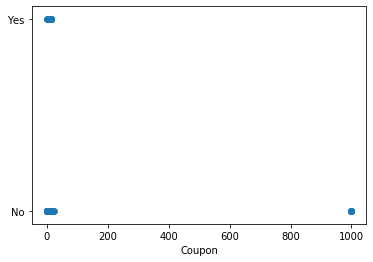

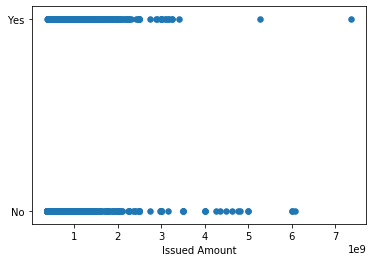

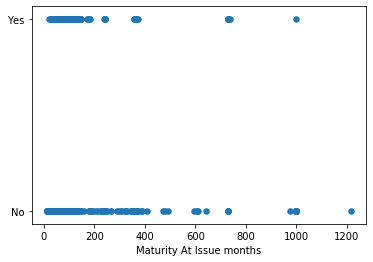

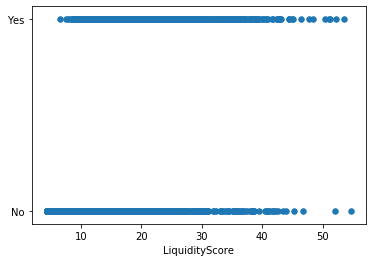

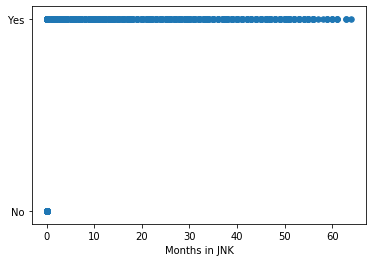

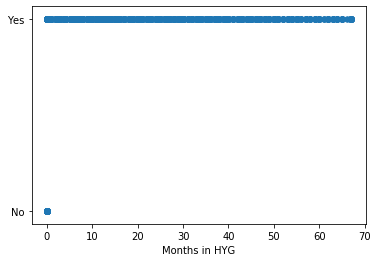

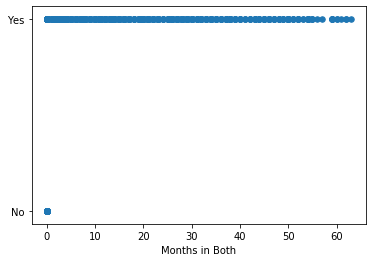

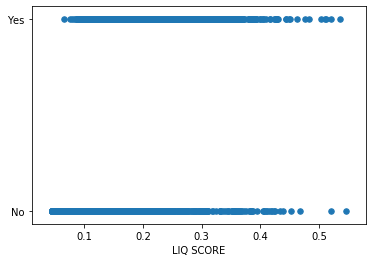

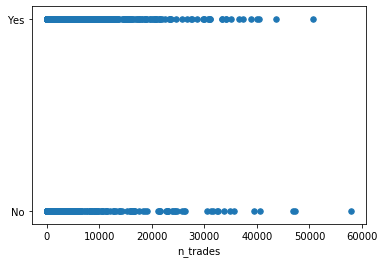

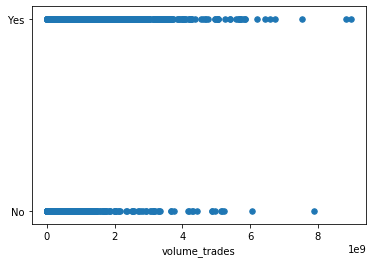

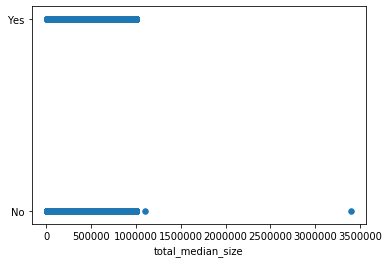

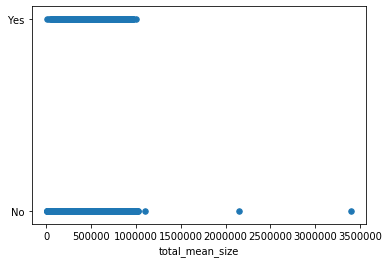

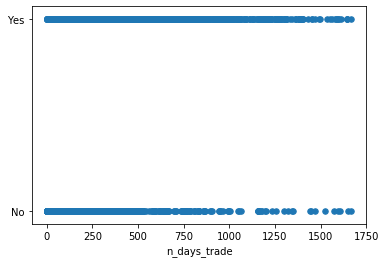

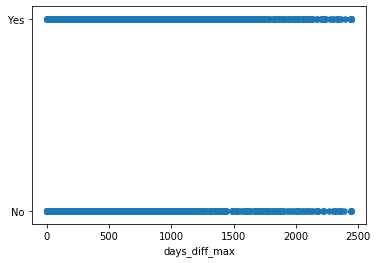

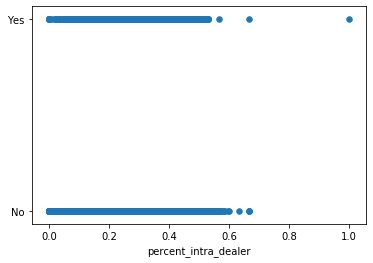

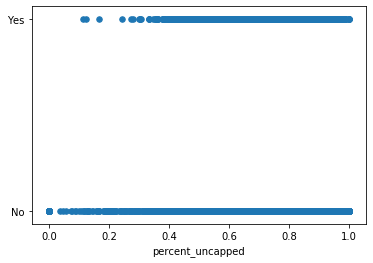

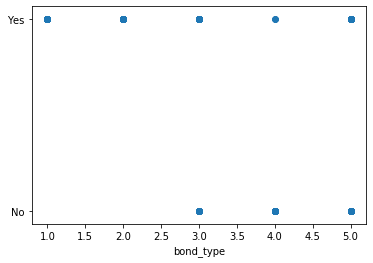

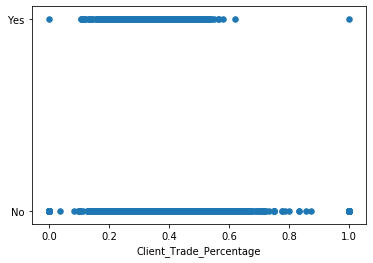

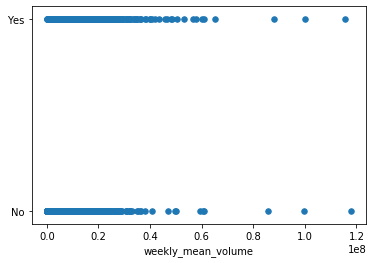

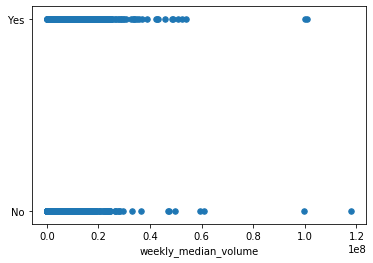

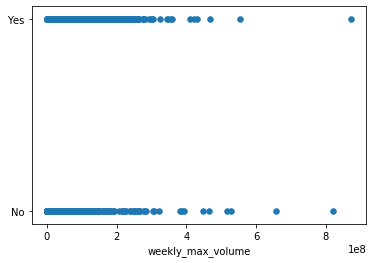

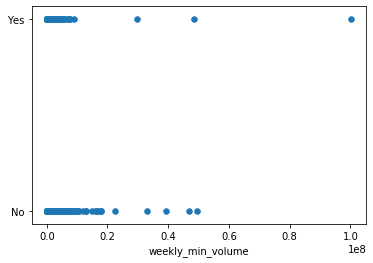

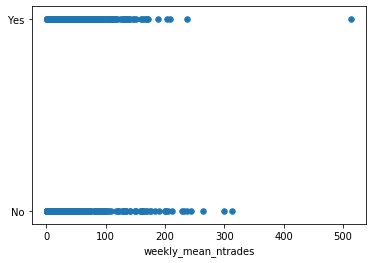

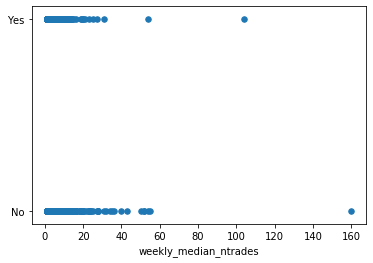

In [20]:
### Scatter Plot for Numerical Values vs IN_ETF
for i in list_of_numerical_col:
    plt.scatter(df_bond[i], df_bond["IN_ETF"], s=30)
    plt.xlabel(i)
    plt.show()

###### 2.9

I used https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas as guidance

In [21]:
### Correlation Matrix
corr = df_bond[list_of_numerical_col].corr()
corr.style.background_gradient(cmap='coolwarm')

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,Months in JNK,Months in HYG,Months in Both,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
Coupon,1,-0.014238,0.0988443,-0.0423021,-0.0316476,-0.0360384,-0.0275978,-0.0423021,-0.0233301,-0.0267171,0.0446013,0.0268907,-0.0283363,-0.0250892,-0.0143163,-0.0458972,0.0518559,0.0291248,-0.0277242,-0.0285842,-0.0263617,-0.0144385,-0.0280447,-0.0183263
Issued Amount,-0.014238,1,0.00860103,0.13493,0.0948286,0.052044,0.13682,0.13493,0.156948,0.32631,0.0623429,0.0783621,0.068113,-0.00809704,0.0526173,-0.112369,-0.0707143,-0.0495129,0.38205,0.396947,0.261469,0.105208,0.27442,0.188765
Maturity At Issue months,0.0988443,0.00860103,1,0.0725068,-0.0542117,-0.0552298,-0.0424904,0.0725068,0.0388389,-0.0152268,-0.115086,-0.138581,0.0295302,0.103178,0.104127,0.100168,0.10299,-0.0401862,-0.0230016,-0.0328677,-0.0171373,-0.0203923,0.0367291,0.00657332
LiquidityScore,-0.0423021,0.13493,0.0725068,1,0.369726,0.537855,0.385351,1,0.803139,0.786718,-0.627008,-0.65698,0.87304,0.71728,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.0257069,0.673569,0.239951
Months in JNK,-0.0316476,0.0948286,-0.0542117,0.369726,1,0.60212,0.874485,0.369726,0.22817,0.49322,-0.0796019,-0.0679714,0.485822,0.344136,0.186363,0.0933964,-0.632745,-0.168572,0.179907,0.194785,0.212305,-0.0496459,0.111642,-0.0359322
Months in HYG,-0.0360384,0.052044,-0.0552298,0.537855,0.60212,1,0.727735,0.537855,0.339763,0.56134,-0.229853,-0.208559,0.687806,0.522358,0.311058,0.201064,-0.672686,-0.243049,0.146767,0.16186,0.208108,-0.0630803,0.153071,-0.0263845
Months in Both,-0.0275978,0.13682,-0.0424904,0.385351,0.874485,0.727735,1,0.385351,0.241274,0.520494,-0.104505,-0.0849723,0.486494,0.326563,0.201814,0.0996741,-0.625617,-0.164876,0.206252,0.223336,0.235184,-0.0313114,0.129846,-0.0122524
LIQ SCORE,-0.0423021,0.13493,0.0725068,1,0.369726,0.537855,0.385351,1,0.803139,0.786718,-0.627008,-0.65698,0.87304,0.71728,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.0257069,0.673569,0.239951
n_trades,-0.0233301,0.156948,0.0388389,0.803139,0.22817,0.339763,0.241274,0.803139,1,0.769322,-0.425801,-0.468673,0.70431,0.497633,0.415695,0.39688,-0.208283,-0.348408,0.309053,0.285998,0.432955,-0.0413345,0.804753,0.234165
volume_trades,-0.0267171,0.32631,-0.0152268,0.786718,0.49322,0.56134,0.520494,0.786718,0.769322,1,-0.276204,-0.278564,0.772564,0.540932,0.387555,0.241814,-0.452584,-0.327922,0.503159,0.479018,0.616802,-0.0371984,0.602055,0.144272


##### 2.10
 I used https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas as guidance


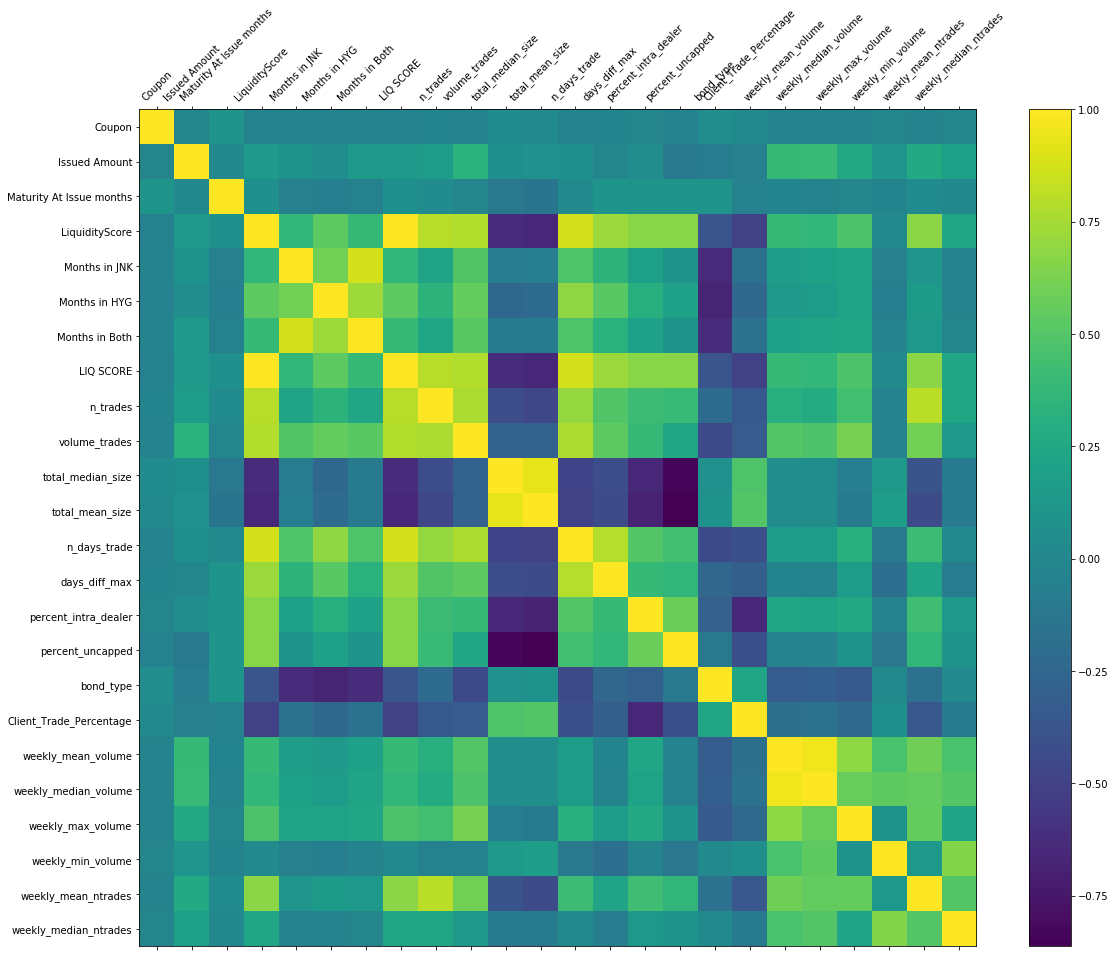

In [22]:
### Heat Map for Numberical Values
f = plt.figure(figsize=(19, 15))
plt.matshow(df_bond[list_of_numerical_col].corr(), fignum=f.number)
plt.xticks(range(df_bond[list_of_numerical_col].shape[1]), df_bond[list_of_numerical_col].columns, fontsize=10, rotation=45)
plt.yticks(range(df_bond[list_of_numerical_col].shape[1]), df_bond[list_of_numerical_col].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [23]:
print("My name is Farbod Baharkoush")
print("My NetID is: fbahar2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Farbod Baharkoush
My NetID is: fbahar2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
